<a href="https://colab.research.google.com/github/jyoti-kumbhar/Data-Science/blob/main/prac7B_decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical No. 7B


*   Aim: Logistic Regression and Decision Tree
1. Build a logistic regression model to predict a binary outcome.
2. Evaluate the model's performance using classification metrics (e.g., accuracy,
precision, recall).
3. Construct a decision tree model and interpret the decision rules for classification.
*   T091 Jyoti Kumbhar



In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [29]:
df = pd. read_csv('/content/Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0.0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0


In [30]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [32]:
df = df.dropna()

In [35]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)
# Initialize label encoder
le = LabelEncoder()
# Encode all categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
print(df.head())

Categorical columns: Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')
   LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0   16273   56   85994       50587          520              80   
1   15941   69   50432      124440          458              15   
2   10891   46   84208      129188          451              26   
3   27874   32   31713       44799          743               0   
4   13482   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1               1          4.81        60      0.68          2   
2               3         21.17        24      0.31          2   
3               3          7.07        24      0.23          1   
4               4          6.51        48      0.73          0   

   EmploymentType  Mar

In [40]:
y = df['Default']
X = df.drop(['Default'], axis=1)

In [42]:
# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
# Accuracy on training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
# Accuracy on test set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.8103261709692379


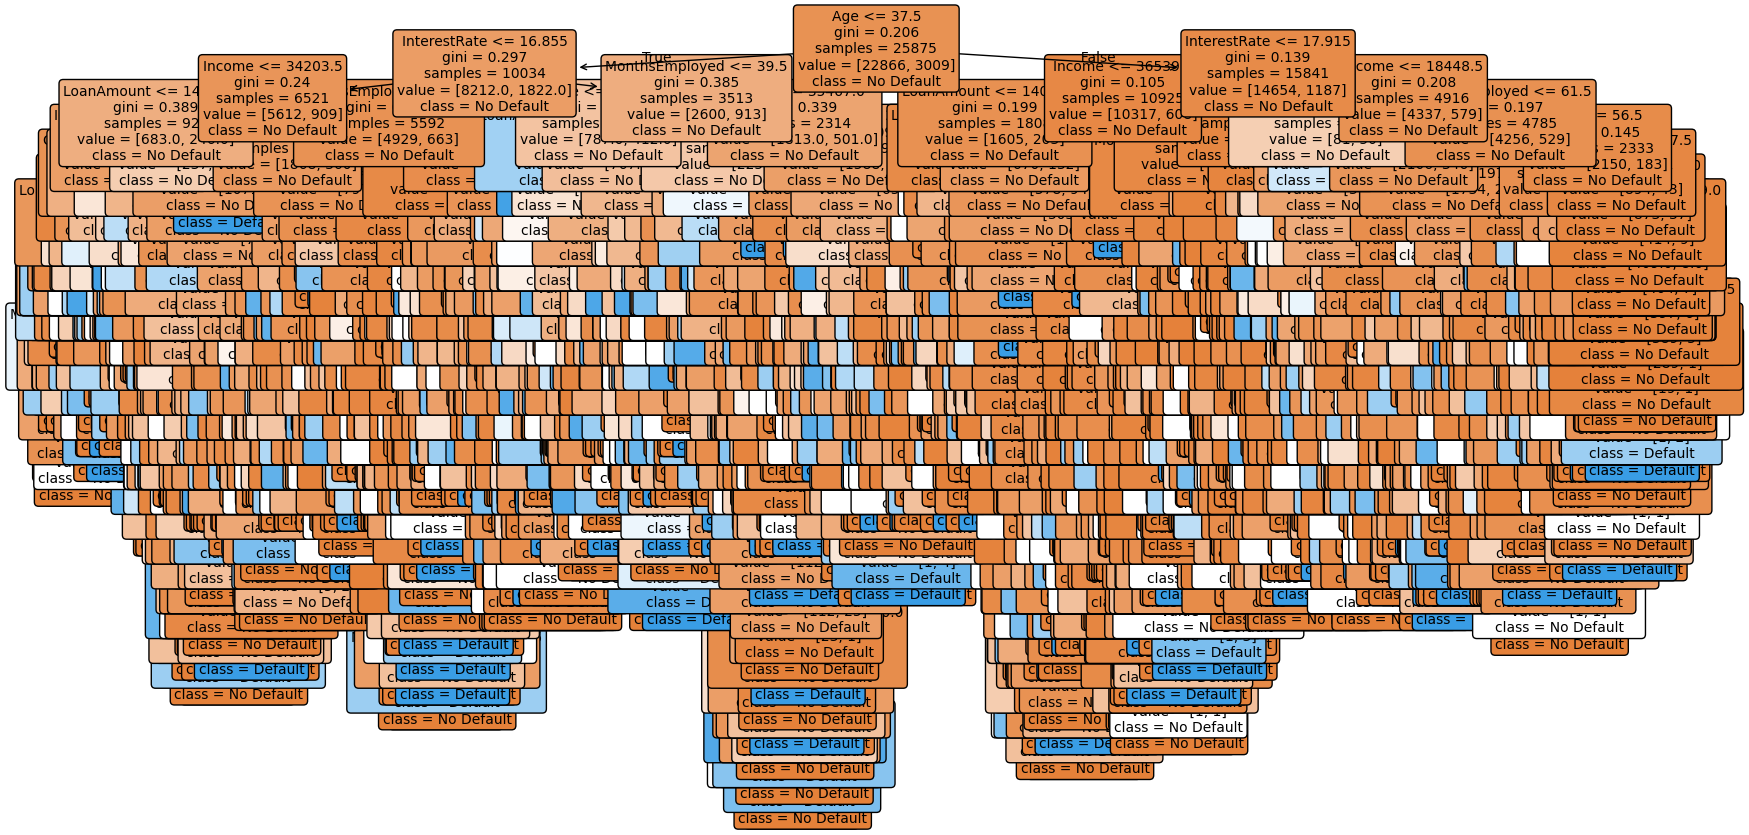

In [44]:
import matplotlib.pyplot as plt
from sklearn import tree
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No Default', 'Default'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

=== Training Set Evaluation ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22866
         1.0       1.00      1.00      1.00      3009

    accuracy                           1.00     25875
   macro avg       1.00      1.00      1.00     25875
weighted avg       1.00      1.00      1.00     25875



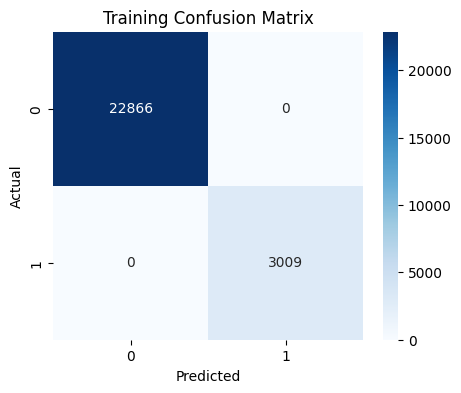


=== Testing Set Evaluation ===
Accuracy: 0.8103261709692379
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      5717
         1.0       0.23      0.26      0.24       752

    accuracy                           0.81      6469
   macro avg       0.56      0.57      0.57      6469
weighted avg       0.82      0.81      0.82      6469



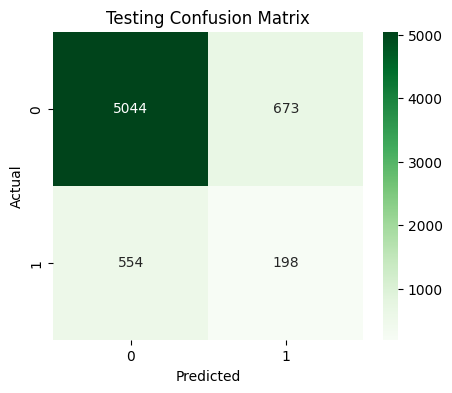

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Predict on training set
y_train_pred = clf.predict(X_train)

# Predict on testing set
y_test_pred = clf.predict(X_test)

# --- Training Evaluation ---
print("=== Training Set Evaluation ===")
train_acc = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_acc)
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# Confusion matrix for training
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Testing Evaluation ---
print("\n=== Testing Set Evaluation ===")
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix for testing
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training ROC-AUC: 1.0
Testing ROC-AUC: 0.5727893944525286


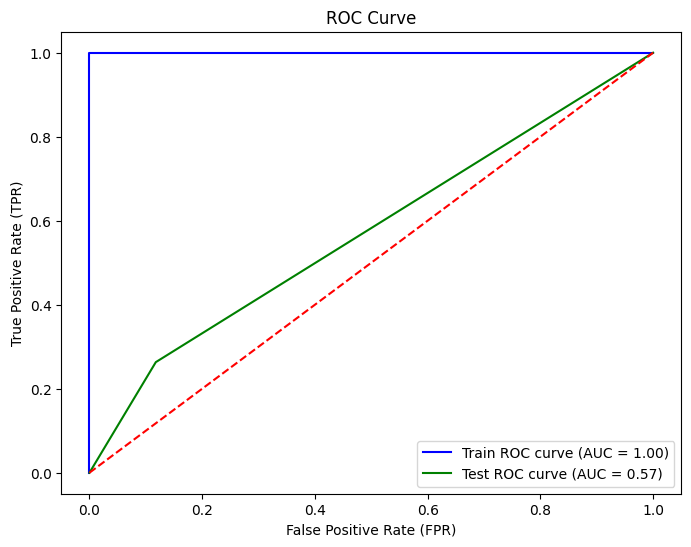

In [46]:
#finding true positive rate and false positive rate
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_train_prob = clf.predict_proba(X_train)[:, 1]
y_test_prob = clf.predict_proba(X_test)[:, 1]

# Compute FPR, TPR for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute FPR, TPR for testing set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Print AUC
print("Training ROC-AUC:", roc_auc_train)
print("Testing ROC-AUC:", roc_auc_test)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

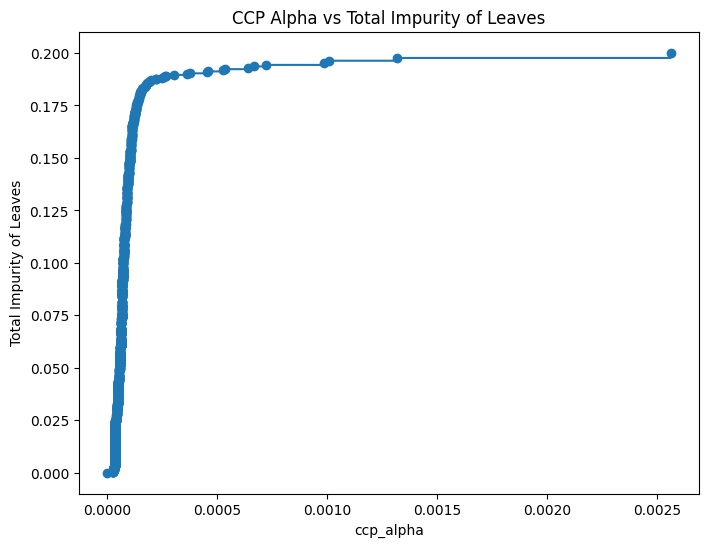

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# Get the cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Remove the last alpha
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]
# Plot alpha vs total leaf impurities
plt.figure(figsize=(8,6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("CCP Alpha vs Total Impurity of Leaves")
plt.show()

In [51]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# Get cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Remove the last element (tree pruned to root)
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]

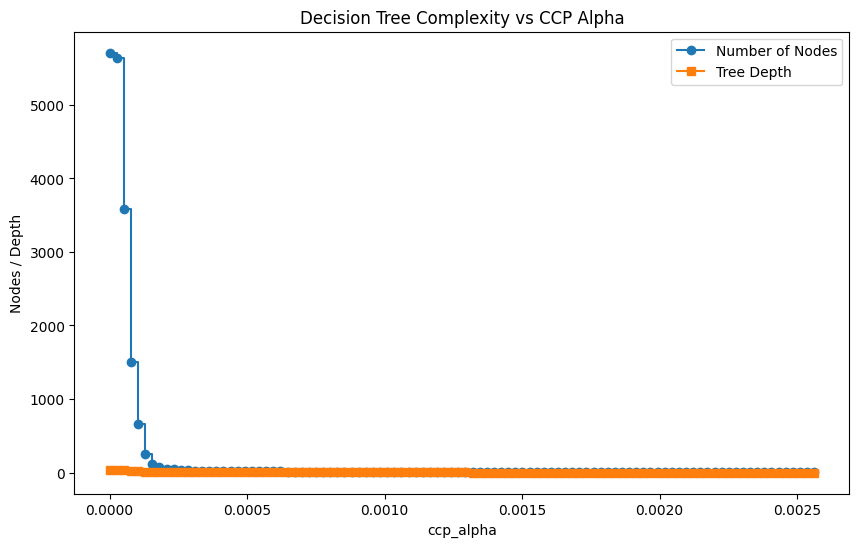

In [58]:
import numpy as np
sampled_alphas = np.linspace(ccp_alphas.min(), ccp_alphas.max(), 100)
clfs = []
for alpha in sampled_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    dt.fit(X_train, y_train)
    clfs.append(dt)
# Collect metrics
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(sampled_alphas, node_counts, marker='o', label="Number of Nodes", drawstyle="steps-post")
ax1.plot(sampled_alphas, depth, marker='s', label="Tree Depth", drawstyle="steps-post")
ax1.set_xlabel("ccp_alpha")
ax1.set_ylabel("Nodes / Depth")
ax1.set_title("Decision Tree Complexity vs CCP Alpha")
ax1.legend()
plt.show()

In [60]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
best_index = np.argmax(test_scores)
best_alpha = sampled_alphas[best_index]
# Train the pruned tree
pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00046585492726734665),
                       random_state=42)

In [62]:
# Training accuracy
train_accuracy = pruned_clf.score(X_train, y_train)
print("Training Accuracy after pruning:", train_accuracy)

# Testing accuracy
test_accuracy = pruned_clf.score(X_test, y_test)
print("Testing Accuracy after pruning:", test_accuracy)


Training Accuracy after pruning: 0.8837101449275362
Testing Accuracy after pruning: 0.8837532848972021


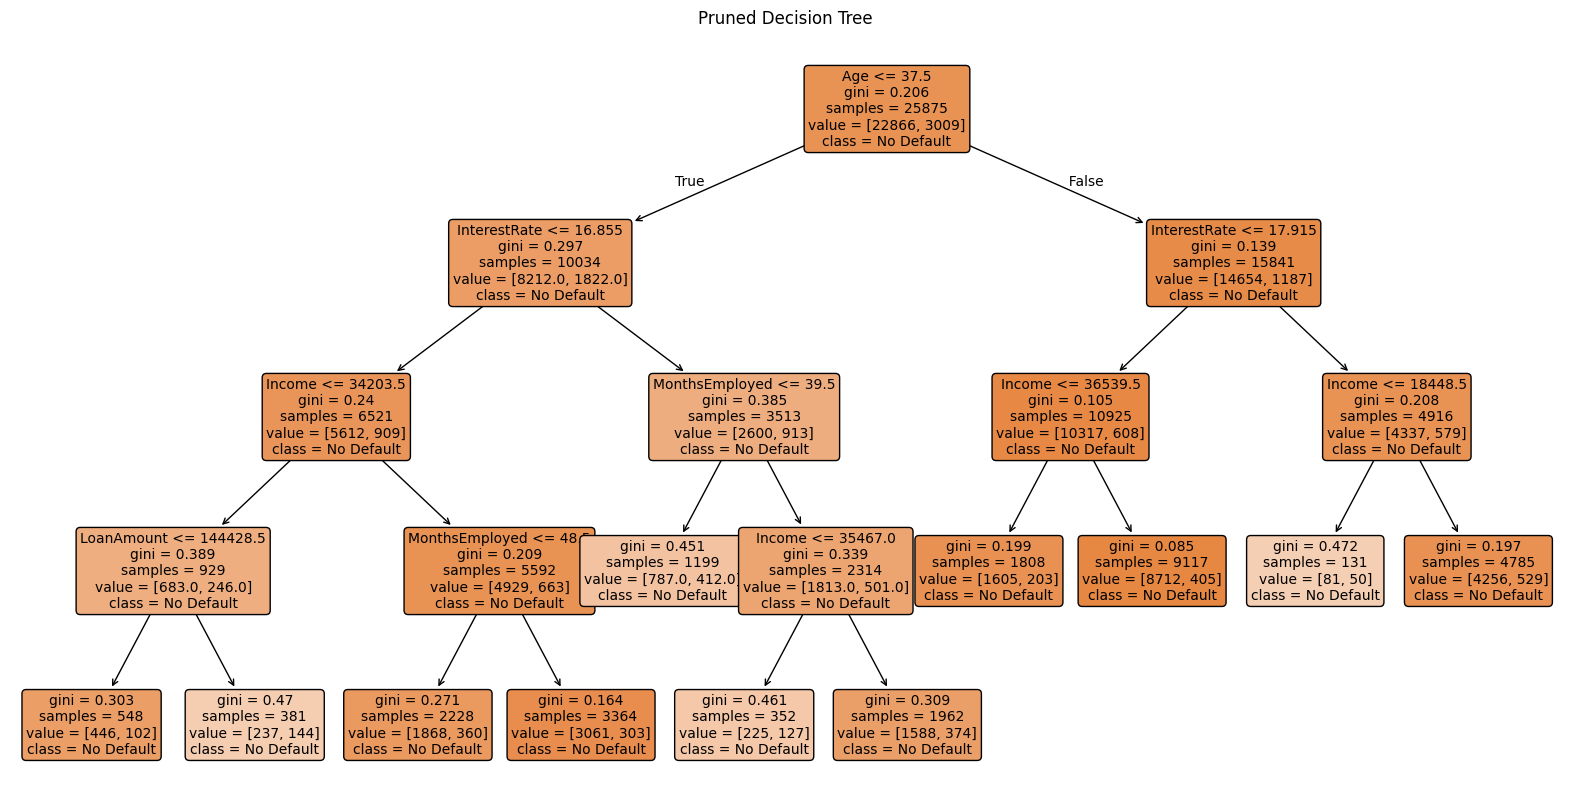

In [63]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the pruned decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    pruned_clf,
    feature_names=X.columns,
    class_names=['No Default', 'Default'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Pruned Decision Tree")
plt.show()